# elimizde aralalar ve özellikleri ile alakalı veriler var bunlara bakarak arabaların fiyatlarını tahmin edeceğiz.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("merc.xlsx")
df.head(3)

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5


# veriyi inceleyip analiz edip veriyi iyice anlamaya çalışalım

In [3]:
# veri kaç satır kaç sütundan oluşuyor
df.shape

(13119, 7)

In [4]:
# verinin özellikleri
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
# eksik veri kontrolü
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

<Figure size 1000x800 with 0 Axes>

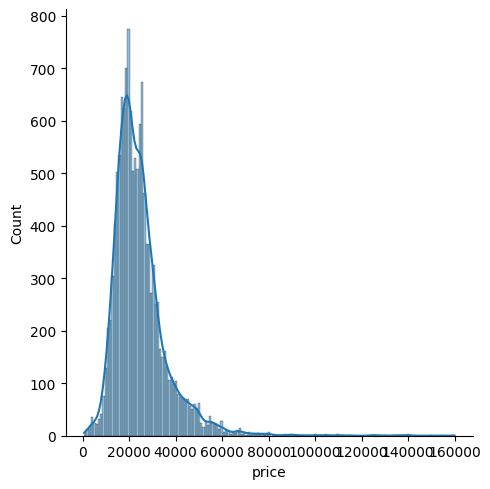

In [6]:
# hedef sutununu görselleştirip dağılımına bakıyoruz. normal dağılımda olmasını istiyoruz. 
plt.figure(figsize=(10,8))
sns.displot(df["price"],kde=True)
plt.show()

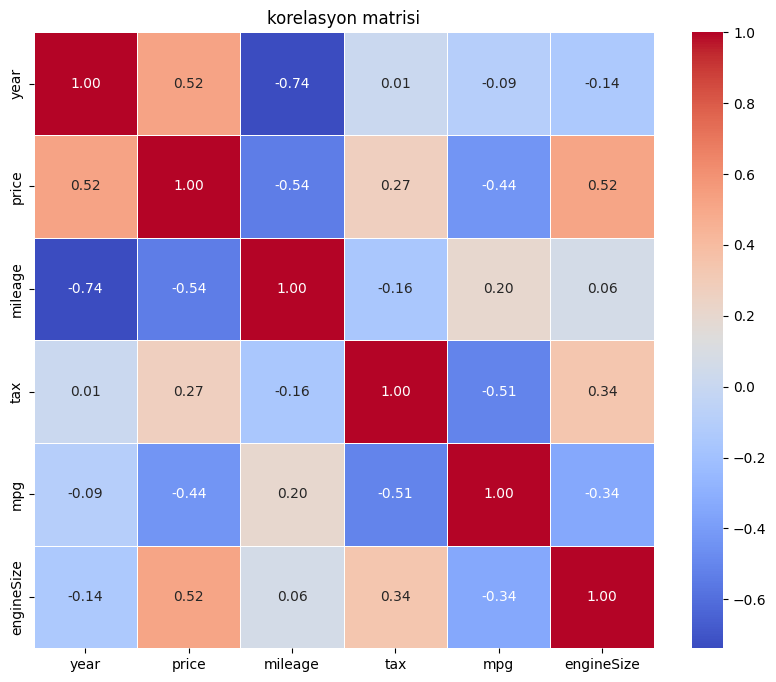

In [7]:
# hedef değişkenimiz ile diğer değişkenler arasındaki korelasyon matrisini inceliyoruz

numeric_columns = df.select_dtypes(include=[np.number]).columns

corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=.5)
plt.title("korelasyon matrisi")
plt.show()

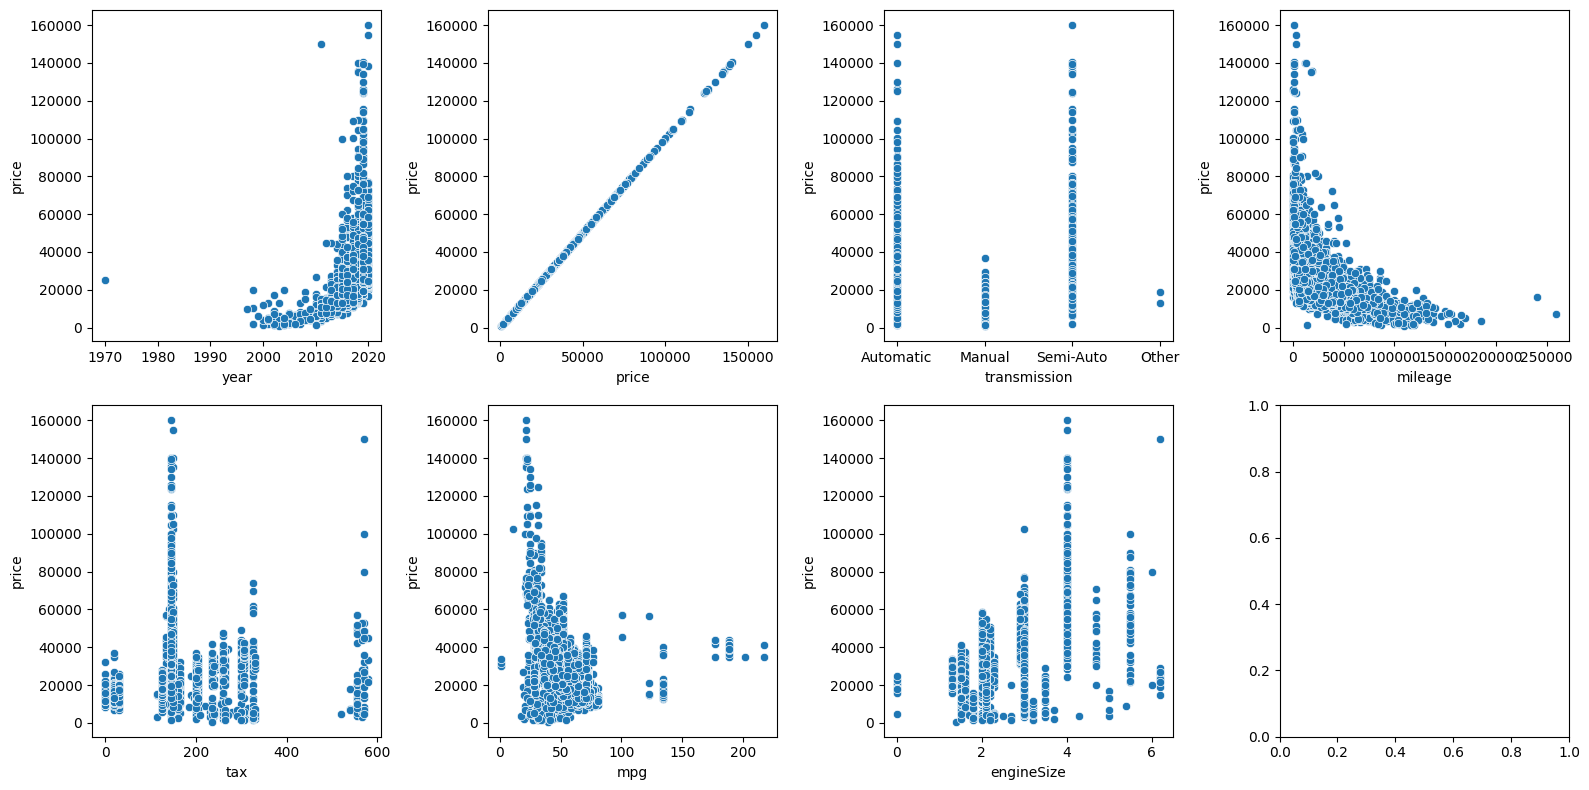

In [8]:
# hedef sutunumuzun ve diğer değişkenler arasındaki grafiğimiz
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Veri çerçevesindeki sütunları belirtin
columns = df.columns

# Her bir scatter plot'u çizin
for i in range(len(columns)):
    row = i // 4
    col = i % 4
    sns.scatterplot(x=columns[i], y="price", data=df, ax=axes[row, col])

# Ekseni paylaşma ve başlık ekleme
plt.tight_layout()
plt.show()



In [9]:
# pahalı verilerimizde çok fazla aykırı değerler var. verimizin uzunluğuna bakıp en pahalı verilerimiz olacakşekilde 0.01 ini atacağız

print(len(df))
print(len(df)*0.01)

13119
131.19


In [10]:
df = df.sort_values("price",ascending=False).iloc[131:]
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


<Figure size 700x500 with 0 Axes>

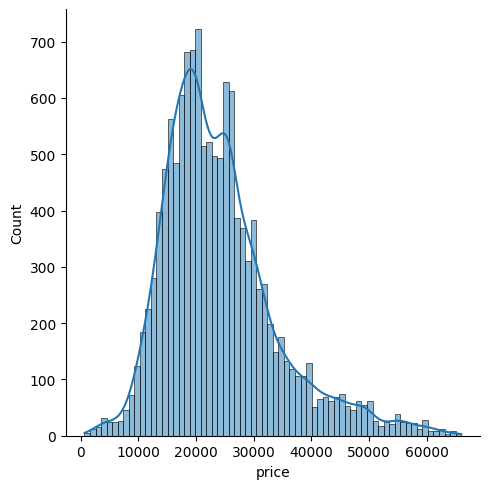

In [11]:
# verimizde daha güzel bir dağılım elde ettik
plt.figure(figsize=(7,5))
sns.displot(df["price"],kde=True)
plt.show()

In [12]:
# yıllara göre gruplayıp fiyatların ortalamasına bakalım
df.groupby("year").mean(["price"])

,price,mileage,tax,mpg,engineSize
year,,,,,
1970,24999.000000,14000.000000,305.000000,39.200000,0.000000
1997,9995.000000,76000.000000,255.000000,28.200000,3.200000
1998,8605.000000,76347.750000,262.500000,28.925000,3.450000
1999,5995.000000,34000.000000,145.000000,24.600000,3.200000
2000,5743.333333,89648.666667,268.333333,26.333333,3.200000
2001,4957.900000,72955.100000,347.500000,28.140000,2.870000
2002,5820.444444,57391.111111,350.555556,27.877778,3.522222
2003,4878.000000,88777.714286,300.000000,29.485714,3.028571
2004,4727.615385,94363.461538,312.307692,31.838462,2.530769


In [13]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [14]:
df.transmission.unique()

array(['Semi-Auto', 'Automatic', 'Manual', 'Other'], dtype=object)

In [15]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder nesnesi oluştur
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Birden fazla one-hot encoding işlemi gerçekleştirilecek sütunlar
target_columns = ['transmission']

# Her bir hedef sütun için one-hot encoding uygula
for target_column in target_columns:
    # Sadece object tipindeki sütunları işle
    if df[target_column].dtype == 'object':
        # One-Hot Encoding işlemini gerçekleştir
        encoded_values = encoder.fit_transform(df[[target_column]])

        # Oluşan one-hot encoding sütunlarını DataFrame'e ekle
        encoded_columns = encoder.get_feature_names_out([target_column])
        df[encoded_columns] = encoded_values

        # İşlenen sütunu kaldır
        df.drop(columns=[target_column], inplace=True)

# DataFrame'i incele
print(df.head())

      year  price  mileage  tax   mpg  engineSize  transmission_Manual  \
6177  2019  65990     5076  150  30.4         3.0                  0.0   
5779  2020  65990      999  145  28.0         4.0                  0.0   
3191  2020  65980     3999  145  28.0         4.0                  0.0   
4727  2019  65000     3398  145  27.2         4.0                  0.0   
8814  2019  64999      119  145  40.9         3.0                  0.0   

      transmission_Other  transmission_Semi-Auto  
6177                 0.0                     1.0  
5779                 0.0                     1.0  
3191                 0.0                     1.0  
4727                 0.0                     1.0  
8814                 0.0                     1.0  


In [16]:
df.head(3)

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Other,transmission_Semi-Auto
6177,2019,65990,5076,150,30.4,3.0,0.0,0.0,1.0
5779,2020,65990,999,145,28.0,4.0,0.0,0.0,1.0
3191,2020,65980,3999,145,28.0,4.0,0.0,0.0,1.0


In [17]:
# İstediğimiz bir kolonun yerini değiştirip sona almak

yer_değiştir = df.pop('price')
df['price'] = yer_değiştir
df.head()

,year,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Other,transmission_Semi-Auto,price
6177,2019,5076,150,30.4,3.0,0.0,0.0,1.0,65990
5779,2020,999,145,28.0,4.0,0.0,0.0,1.0,65990
3191,2020,3999,145,28.0,4.0,0.0,0.0,1.0,65980
4727,2019,3398,145,27.2,4.0,0.0,0.0,1.0,65000
8814,2019,119,145,40.9,3.0,0.0,0.0,1.0,64999


In [18]:
 # X ve y degerlerini olusturalim 
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# rastgele train/test olarak bolelim
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(X_train)
x_test = standard_scaler.transform(X_test)

In [20]:
df.head()

,year,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Other,transmission_Semi-Auto,price
6177,2019,5076,150,30.4,3.0,0.0,0.0,1.0,65990
5779,2020,999,145,28.0,4.0,0.0,0.0,1.0,65990
3191,2020,3999,145,28.0,4.0,0.0,0.0,1.0,65980
4727,2019,3398,145,27.2,4.0,0.0,0.0,1.0,65000
8814,2019,119,145,40.9,3.0,0.0,0.0,1.0,64999


In [54]:
# Dropout yöntemi genellikle aşırı uymayı (overfitting) kontrol etmek ve modelin daha iyi genelleme yapmasını sağlamak amacıyla kullanılan regularizasyon tekniğidir.

from keras.layers import Dropout
def model_oluştur():
    # Modelimizi olusturalim
    model = Sequential()
    model.add(Dense(16, input_shape=(8,), activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1))

    # Modelimizi compile edelim
    model.compile(optimizer="adam", loss="mse")

    return model, X_train, y_train, X_test, y_test

# Modeli oluştur
my_model, X_train, y_train, X_test, y_test = model_oluştur()

In [55]:
# Modelin özetini yazdır
my_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                144       
                                                                 
 dense_31 (Dense)            (None, 32)                544       
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 32)                1056      
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3889 (15.19 KB)
Trainable params: 3889 (

İlk epoch çıktısı (loss): 596701440.0
Son epoch çıktısı (loss): 25428508.0


<Axes: >

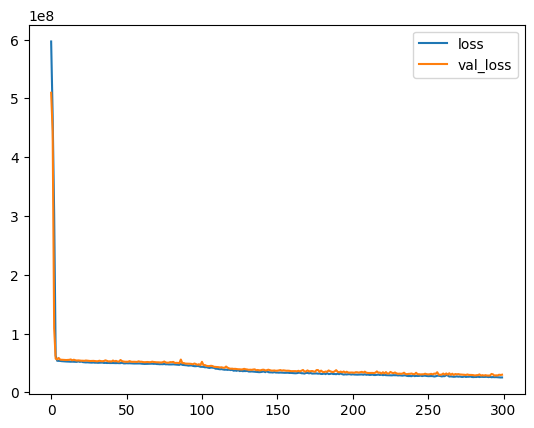

In [56]:
# Modeli eğit
history = my_model.fit(X_train, y_train, epochs=300,validation_data=(X_test,y_test),verbose=0,batch_size=250)

# İlk ve son epoch çıktılarını al
print("İlk epoch çıktısı (loss):", history.history['loss'][0])
print("Son epoch çıktısı (loss):", history.history['loss'][-1])

loss = pd.DataFrame(my_model.history.history)
loss.plot()

# loss ve val_loss grafikleri beraber hareket etmeli yani üst üste olacak şekilde olması daha iyi olduğu anlamına gelir. aksi durumda overfit olabilir

In [57]:
# overfit için modelimizin performansını değerlendirelim.
test_loss = my_model.evaluate(X_test, y_test)

train_loss = my_model.evaluate(X_train, y_train)

print("train_set:",train_loss)
print("test_set:",test_loss)

325/325 [==============================] - 0s 1ms/step - loss: 26755614.0000
train_set: 26755614.0
test_set: 30075032.0


In [58]:
# Predictionlari olusturalim
preds = my_model.predict(X_test)
preds


82/82 [==============================] - 0s 2ms/step


array([[12742.477],
       [36062.64 ],
       [22456.64 ],
       ...,
       [23746.854],
       [25943.621],
       [28052.96 ]], dtype=float32)

In [64]:
pred_df = pd.DataFrame(data=preds,columns=["Tahmin verileri"])
y_test_df = pd.DataFrame(data=y_test,columns=["Gerçek veriler"])

karşılaştırma = pd.concat([pred_df,y_test_df],axis=1)
karşılaştırma.head()

,Tahmin verileri,Gerçek veriler
0,12742.476562,15750
1,36062.640625,21991
2,22456.640625,20498
3,32720.439453,27995
4,22454.121094,24998


In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,preds)

3931.134759422813

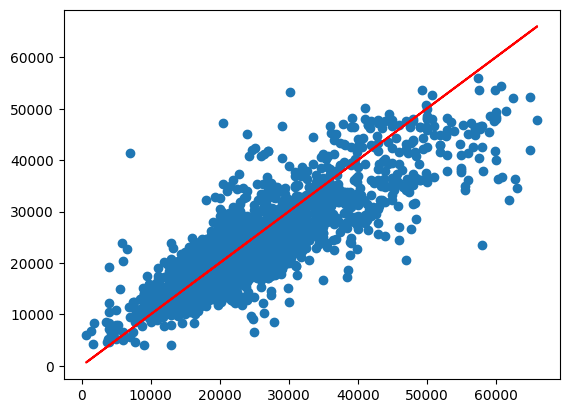

In [60]:
# gerçek değerlerimiz ile tahminlerimizi değerlendirelim

plt.scatter(y_test,preds)
plt.plot(y_test,y_test, color="red")